In [ ]:
# Read Data for PLS
import os
import pandas as pd
df = pd.read_csv('pro_analyze.csv',index_col=0) # old name newnew.csv
df.head()

In [1]:
# Describe
describe_num = df.describe().transpose()
describe_num.to_csv('PLS_df_describe.csv',encoding='big5')

D:\ProgramData\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


總價元              0.508205
鄉鎮市區_大安區         0.285090
總樓層數             0.283116
車位總價元            0.276417
總樓層數平方           0.244972
建物型態_住宅大樓        0.229387
有無管理組織_有         0.218061
移轉層次             0.193991
主要建材_見其他登記事項     0.193456
鄉鎮市區_中正區         0.182930
車位移轉總面積(平方公尺)    0.179461
車位筆數             0.151428
建物型態_店面          0.146474
電梯_有             0.143146
Name: 單價元平方公尺, dtype: float64


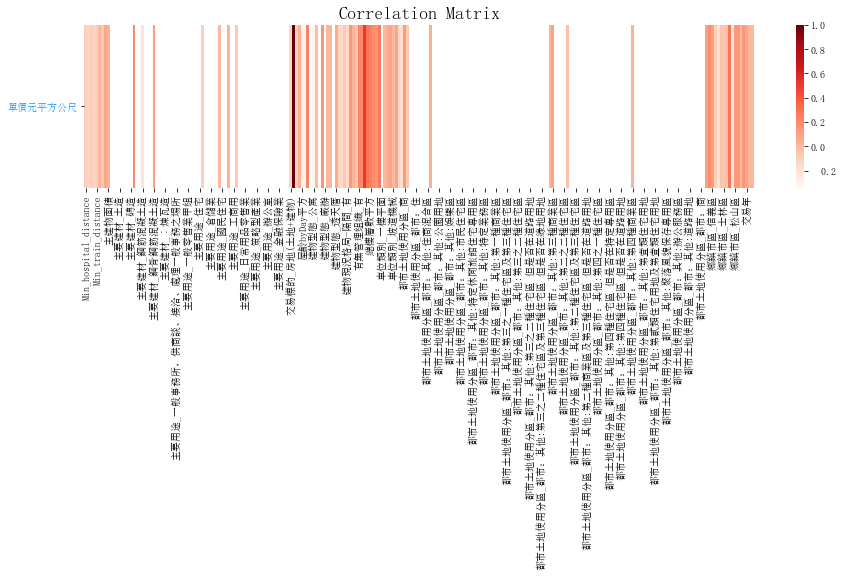

In [4]:
# heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = df.corr()
plt.rcParams['figure.figsize'] = 15,3
sns.heatmap(df.sort_values(by=['單價元平方公尺'], ascending=False).head(1), cmap='Reds')
plt.title("Correlation Matrix", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
# plt.savefig('corr.png')

# top 10 
print (df['單價元平方公尺'].sort_values(ascending=False).iloc[1:15])
df.to_csv('correlation_matrix.csv',encoding='big5')

In [12]:
## PLS regression
import gc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('pro_analyze.csv',index_col=0)
# gc.collect()

# ## 切分資料
x = df.drop(columns=['總價元','單價元平方公尺'])
y = np.array(df['單價元平方公尺'])


## 標準化後資料
# x = StandardScaler().fit_transform(df.drop(columns=['總價元','單價元平方公尺']))
# y = np.array(df['單價元平方公尺'])

# 70% train 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=43)

In [13]:
from sklearn.cross_decomposition import PLSRegression
import math
import sklearn.metrics as sklm

pls = PLSRegression()
model = pls.fit(x, y)

# 預測
y_PLS_train= model.predict(x_train)
y_PLS_test= model.predict(x_test)

# validation( train data and validate data)
print('RMSE_train_PLS = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_PLS_train))))
print('RMSE_test_PLS = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_PLS_test))))
print('=================')

# 準確度
print('PLS train:',model.score(x_train, y_train))
print('PLS test:',model.score(x_test, y_test))

RMSE_train_PLS = 0.2359233503218365
RMSE_test_PLS = 0.2353152030067303
PLS train: 0.43477928948742484
PLS test: 0.42370264715363226


In [14]:
# 檢視特徵係數
coef = pd.DataFrame(model.coef_)
coef.index = x_train.columns 
coef.sort_values(by=0,ascending=False).to_csv('PLS_coef.csv',encoding='big5')

In [15]:
coef.sort_values(by=0,ascending=False).head(10)

,0
鄉鎮市區_大安區,0.057000
鄉鎮市區_中正區,0.031876
鄉鎮市區_松山區,0.030807
建物型態_店面,0.028626
鄉鎮市區_信義區,0.026955
車位總價元,0.026537
主要建材_見其他登記事項,0.018981
鄉鎮市區_中山區,0.015749
建物型態_透天厝,0.013760
電梯_有,0.012834


In [16]:
coef.sort_values(by=0,ascending=True).head(10)

,0
鄉鎮市區_文山區,-0.041586
鄉鎮市區_北投區,-0.030867
屋齡byDay,-0.029820
建物型態_公寓,-0.029512
屋齡byDay平方,-0.024026
建物現況格局-房,-0.019830
鄉鎮市區_內湖區,-0.019672
Min_mrt distance,-0.018983
主要建材_鋼筋混凝土造,-0.018056
建物現況格局-隔間_有,-0.015919
